In [1]:
from dataset import *
from demo import *

running on CPU
running on CPU


In [2]:
args = get_args()

In [3]:
args._get_args

<bound method _AttributeHolder._get_args of Namespace(mode='4D-FED-GNN++', num_folds=5, num_regions=35, num_timepoints=3, num_epochs=2, lr_g=0.01, lr_d=0.0002, decay=0.0, C=14, D=7, batch_num=1, tp_coeff=0.0, g_coeff=2.0, i_coeff=2.0, kl_coeff=0.001, exp=1, lr=0.001, tp_coef=10)>

In [4]:
# random seed
manualSeed = 1

np.random.seed(manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

In [5]:
# 120 samples and 6 timepoints.
X = prepare_data(new_data=True,n_samples=120,n_times=6)

(120, 6, 35, 35, 4)


In [6]:
# Convert X to tensor 
X = torch.from_numpy(X)
X = X.type(torch.FloatTensor)

In [7]:
# Create table
table = np.zeros((args.num_folds - 1, args.num_timepoints))
table = random_table(args, 4/8)

In [8]:
args,hospitals,test_data,f=train(args,X[:, :, :, :, 0], table)

------------------------------------Fold [1/5]-----------------------------------------
-----------------------------------------------------------------------------
Ordering of the hospitals:  [3 2 1 0]
Epoch [1/2]
Hospital [4/4]
[Train] Loss T1: 1.19668 [Train] TP Loss T1: 1003.82438  [Train] Total Loss T1: 5019.72030 
Hospital [3/4]
[Train] Loss T1: 1.20496 [Train] TP Loss T1: 1019.60143  [Train] Total Loss T1: 5098.60965 
Hospital [2/4]
[Train] Loss T1: 1.05459 [Train] TP Loss T1: 752.84751  [Train] Total Loss T1: 3764.76489 
Hospital [1/4]
[Train] Loss T1: 0.62320 [Train] TP Loss T1: 549.94068  [Train] Total Loss T1: 5500.03003 
Epoch [2/2]
Hospital [4/4]
[Train] Loss T1: 0.34089 [Train] TP Loss T1: 76.91100  [Train] Total Loss T1: 384.72542 
Hospital [3/4]
[Train] Loss T1: 0.38297 [Train] TP Loss T1: 99.69861  [Train] Total Loss T1: 498.68454 
Hospital [2/4]
[Train] Loss T1: 0.34616 [Train] TP Loss T1: 79.89188  [Train] Total Loss T1: 399.63249 
Hospital [1/4]
[Train] Loss T1: 0.

In [9]:
data = test_data[0].to(device)

In [10]:
data.shape 

torch.Size([35, 35])

In [14]:
data[0].cpu().detach().numpy().shape 

(35,)

In [21]:
out[1].shape 

torch.Size([35])

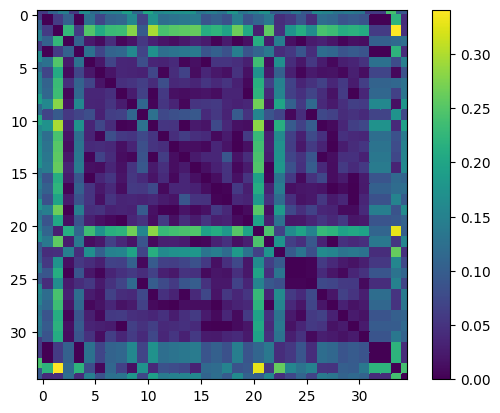

In [16]:
out = data
fig = plt.figure()
plt.pcolor(abs(out))
plt.colorbar()
plt.imshow(out)

ValueError: not enough values to unpack (expected 2, got 1)

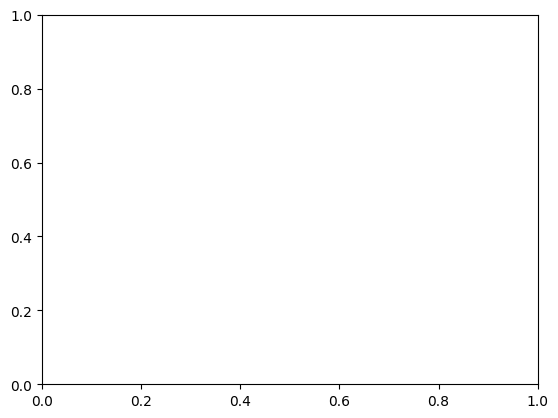

In [12]:
plot_matrix(data[0].cpu().detach().numpy(), "t" + str(0) + "gt" + str(0))

In [31]:
validate_1(args, hospitals, test_data, f)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
[Val]: MAE Loss Model1: 0.13208[Val]: MAE Loss Model2: 0.35533 
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
[Val]: MAE Loss Model1: 0.13216[Val]: MAE Loss Model2: 0.44034 
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
[Val]: MAE Loss Model1: 0.13781[Val]: MAE Loss Model2: 0.44684 
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
[Val]: MAE Loss Model1: 0.14259[Val]: MAE Loss Model2: 0.48683 


In [29]:
def validate_1(args, hospitals, test_data, f):
    """
        Output:
            plotting of each predicted testing brain graph, also saved as a numpy file
            average MAE of predicted brain graphs
    """
    mael = torch.nn.L1Loss().to(device)

    val_hos = len(test_data)
    for j, hospital in enumerate(hospitals):
        hloss = []
        for k in range(len(hospital.models)):
            hospital.models[k].eval()
            hloss.append(0)

        with torch.no_grad():
            for i, data in enumerate(test_data):
                data = data.to(device)
                out_1 = data#[0]
                for k, model in enumerate(hospital.models):
                    print(i,k)
                    temp = model.rnn[0].hidden_state
                    out_1 = model(out_1)
                    model.rnn[0].hidden_state = temp
                    hloss[k] += mael(out_1, data[k + 1])
                    plot_matrix(data.cpu().detach().numpy(), "t" + str(k) + "gt" + str(i))
                    plot_matrix(out_1.cpu().detach().numpy(), "exp_" + str(args.exp) + "t" + str(k + 1) + "_sample" + str(i) + "_hos" + str(j))
                    np.save("np_graphs/t" + str(k) + "gt" + str(i), data[k].cpu().detach().numpy())
                    np.save("np_graphs/exp_" + str(args.exp) + "t" + str(k + 1) + "_sample" + str(i) + "_hos" + str(j), out_1.cpu().detach().numpy())

                plot_matrix(data.cpu().detach().numpy(), "t" + str(k) + "gt" + str(i))
                np.save("np_graphs/t" + str(k + 1) + "gt" + str(i), data.cpu().detach().numpy())

        for k in range(1, args.num_timepoints):
            print(
                '[Val]: MAE Loss Model' + str(k) + f': {hloss[k - 1] / val_hos:.5f}', sep=' ', end='', flush=True)

        print(" ")

In [43]:
j = 0
k = 0
model = hospitals[0].models[0]
hospital = hospitals[0]
out_1 = test_data[0]#[0]
out_1.shape 

torch.Size([35, 35])

In [44]:
out_1 = model(out_1)
out_1

In [45]:
out_1.shape 

torch.Size([35, 35])

In [15]:
test_data.shape 

torch.Size([6, 35, 35])

In [20]:
validate_1(args, hospitals, test_data, f)

0 0


IndexError: tuple index out of range